<a href="https://colab.research.google.com/github/akki0894/Advanced-Data-Analytics/blob/main/Advanced_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df_1 = pd.read_csv('longley.csv')
df_1.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP
0,60323,83.0,234289,2356,1590,107608
1,61122,88.5,259426,2325,1456,108632
2,60171,88.2,258054,3682,1616,109773
3,61187,89.5,284599,3351,1650,110929
4,63221,96.2,328975,2099,3099,112075


In [ ]:
df = df_1.drop('TOTEMP',axis=1)
X = df
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


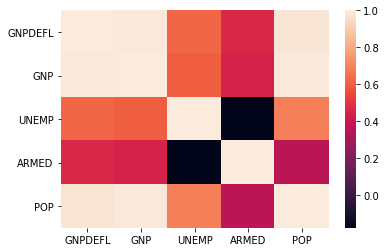

In [ ]:
sns.heatmap(df.corr())

In [ ]:
Y = df_1['TOTEMP']
Y.head()

0    60323
1    61122
2    60171
3    61187
4    63221
Name: TOTEMP, dtype: int64

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y,X).fit()

In [ ]:
model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           3.70e-09
Time:                        14:54:22   Log-Likelihood:                -117.83
No. Observations:                  16   AIC:                             247.7
Df Residuals:                      10   BIC:                             252.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.246e+04   3.52e+04      2.629      0.025    1.41e+04    1.71e+05
GNPDEFL      -48.4628    132.248     -0.366      0.722    -343.129     246.204
GNP            0.0720      0.032      2.269      0.047       0.001       0.143
UNEMP         -0.4039      0.439     -0.921      0.379      -1.381       0.573
ARMED         -0.5605      0.284     -1.975      0.077      -1.193       0.072
POP           -0.4035      0.330     -1.222      0.250      -1.139       0.332
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                     1.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

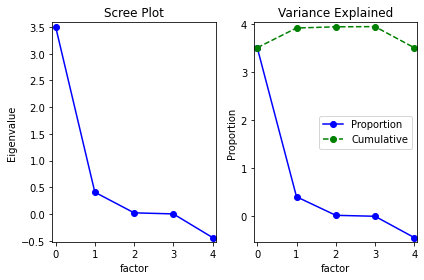

In [ ]:
from statsmodels.multivariate.factor import Factor
model = Factor(df).fit()
model.plot_scree()
plt.show()

In [ ]:
from statsmodels.multivariate.pca import PCA

In [ ]:
pc = PCA(df,
         ncomp=2,
         standardize=True,
         demean=True,
         normalize=False)

In [ ]:
df_comp = pc.loadings.T
df_comp

,GNPDEFL,GNP,UNEMP,ARMED,POP
comp_0,0.521013,0.519909,0.365806,0.229642,0.521240
comp_1,-0.058090,-0.053455,0.595323,-0.798315,0.045299


<PC0 = 0.521013GNPDEFL+	0.519909GNP+0.365806UNEMP+0.229642ARMED+0.521240POP>


<PC1 = -0.058090GNP-0.053455GNPDEFL+0.595323UNEMP-0.798315ARMED+0.045299POP>			


In [ ]:
#PCA Scores

X_factors =  pc.factors
X_factors


,comp_0,comp_1
0,-3.204945,0.776652
1,-2.773855,0.877361
2,-2.104761,1.590765
3,-1.929308,1.318500
4,-1.279159,-1.276178
5,-0.893386,-1.985051
6,-0.649108,-1.973110
7,0.098944,-0.612634
8,0.059434,-0.716200
9,0.352178,-0.565773


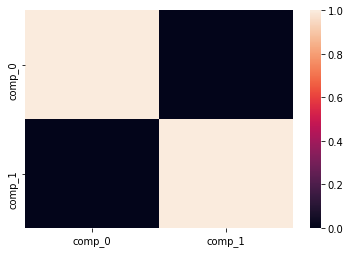

In [ ]:
sns.heatmap(X_factors.corr())
plt.show()

As we reduced dimensions, the problem of multicollinearity is solved

In [ ]:
X_pca = sm.add_constant(X_factors)

In [ ]:
Y.head()

0    60323
1    61122
2    60171
3    61187
4    63221
Name: TOTEMP, dtype: int64

# Multiple Linear Regression


In [ ]:
model = sm.OLS(Y,X_pca).fit()
model.summary()

# Therefore the Multiple Linear Regression Model becomes
# y = b0 + b1*pc0 + b2*pc2 instead of y = a0 + a1*GNPDEF + a2*GNP + a3*Armed + a4*UNEMP + a5*POP 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     73.66
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           8.10e-08
Time:                        14:54:23   Log-Likelihood:                -132.71
No. Observations:                  16   AIC:                             271.4
Df Residuals:                      13   BIC:                             273.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.532e+04    268.567    243.206      0.000    6.47e+04    6.59e+04
comp_0      1701.9208    141.357     12.040      0.000    1396.537    2007.305
comp_1      -380.1542    247.725     -1.535      0.149    -915.332     155.024
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.401
Skew:                          -0.211   Prob(JB):                        0.818
Kurtosis:                       2.349   Cond. No.                         1.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we take n_comp = 2 then we have to drop a component and also the Adj.R-square is lesser when comapared to n_comp = 3 where there is no requirement to drop any component.

# K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
wine_data = pd.read_csv("winequality-red.csv")
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data_x = wine_data.iloc[:,0:11]
# Standardize the data

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
wine_data_z = min_max_scaler.fit_transform(wine_data_x)
wine_data_z

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [ ]:
cluster_range = range(2,10)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 2)
  clusters.fit(wine_data_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)

# combine the cluster_range and cluster_error into a dataframe by combining them

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors })
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,239.183110
1,3,209.323704
2,4,189.482830
3,5,172.523387
4,6,158.792401
5,7,150.381735
6,8,144.736248
7,9,137.571696


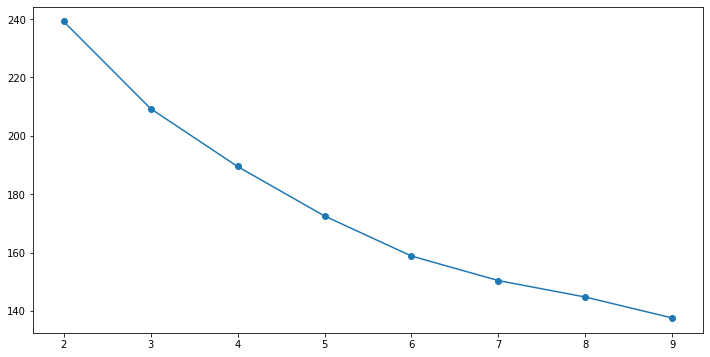

In [ ]:
# Elbow Plot 
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o");

In [ ]:
cluster = KMeans(n_clusters = 6, random_state = 1)
cluster.fit(wine_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [ ]:
# Get the centroids using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451],
       [0.26445344, 0.35309445, 0.11787194, 0.09167892, 0.12294502,
        0.14725074, 0.10496896, 0.49040682, 0.48586088, 0.15907169,
        0.22330388],
       [0.16055626, 0.3357038 , 0.08683673, 0.09236092, 0.09370209,
        0.25596436, 0.13158938, 0.30750847, 0.59380524, 0.18138213,
        0.51003401],
       [0.57321283, 0.20243126, 0.51173759, 0.13079277, 0.12947702,
        0.13430227, 0.08924141, 0.6412139 , 0.33821969, 0.23017794,
        0.31209311],
       [0.31872149, 0.2800987 , 0.30158385, 0.15289713, 0.12704404,
        0.37982241, 0.29560169, 0.54199843, 0.43422018, 0.17884108,
        0.21297977],
       [0.3369469 , 0.15871861, 0.40966667, 0.10228311, 0.10409015,
        0.16819249, 0.08611602, 0.38941202, 0.42936352, 0.22846806,
        0.49237179]])

In [ ]:
centroid_df = pd.DataFrame(centroids, columns = list(wine_data_z))

In [ ]:
prediction = cluster.predict(wine_data_z)
wine_data_x["Group"] = pd.DataFrame(prediction, columns = ["Group"])
wine_data_x.head(20)
print(wine_data_x.groupby("Group").count())
print(wine_data.groupby("quality").count())

       fixed_acidity  volatile_acidity  citric_acid  ...   pH  sulphates  alcohol
Group                                                ...                         
0                 28                28           28  ...   28         28       28
1                531               531          531  ...  531        531      531
2                196               196          196  ...  196        196      196
3                282               282          282  ...  282        282      282
4                322               322          322  ...  322        322      322
5                240               240          240  ...  240        240      240

[6 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Logistic Regression

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
classifier = sm.Logit(y_train, X_train)
fit = classifier.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.431764
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Sep 2021   Pseudo R-squ.:                  0.3448
Time:                        14:55:23   Log-Likelihood:                -129.53
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 1.702e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9250      0.243      7.915      0.000       1.448       2.402
x2             1.0735      0.

## Confusion Matrix


In [ ]:
y_pred = fit.predict(X_test)>=0.5
y_pred.astype(int)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[54, 14],
       [ 2, 30]])

## Normality Check using Shapiro-Wilkinson Test

In [ ]:
from scipy import stats
stats.shapiro(X_train)

(0.9764761328697205, 3.119669500506461e-08)

In [ ]:
stats.shapiro(y_train)

(0.6114231944084167, 1.7616309254284611e-25)

In [ ]:
stats.shapiro(y_train)

(0.6114231944084167, 1.7616309254284611e-25)

## Multi-Collinearity

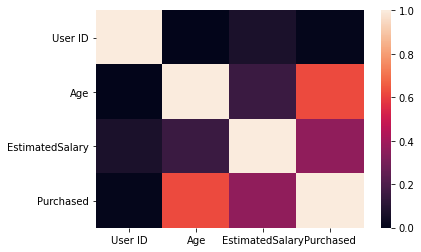

In [ ]:
sns.heatmap(df.corr())

There is no Multicollinearity

# Decision Trees

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
col_names = ['pregnant', 'insulin','bmi','age','glucose','bp','pedigree','skin','label']
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,skin,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree','skin']
X = pima[feature_cols]
y = pima.label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7283464566929134


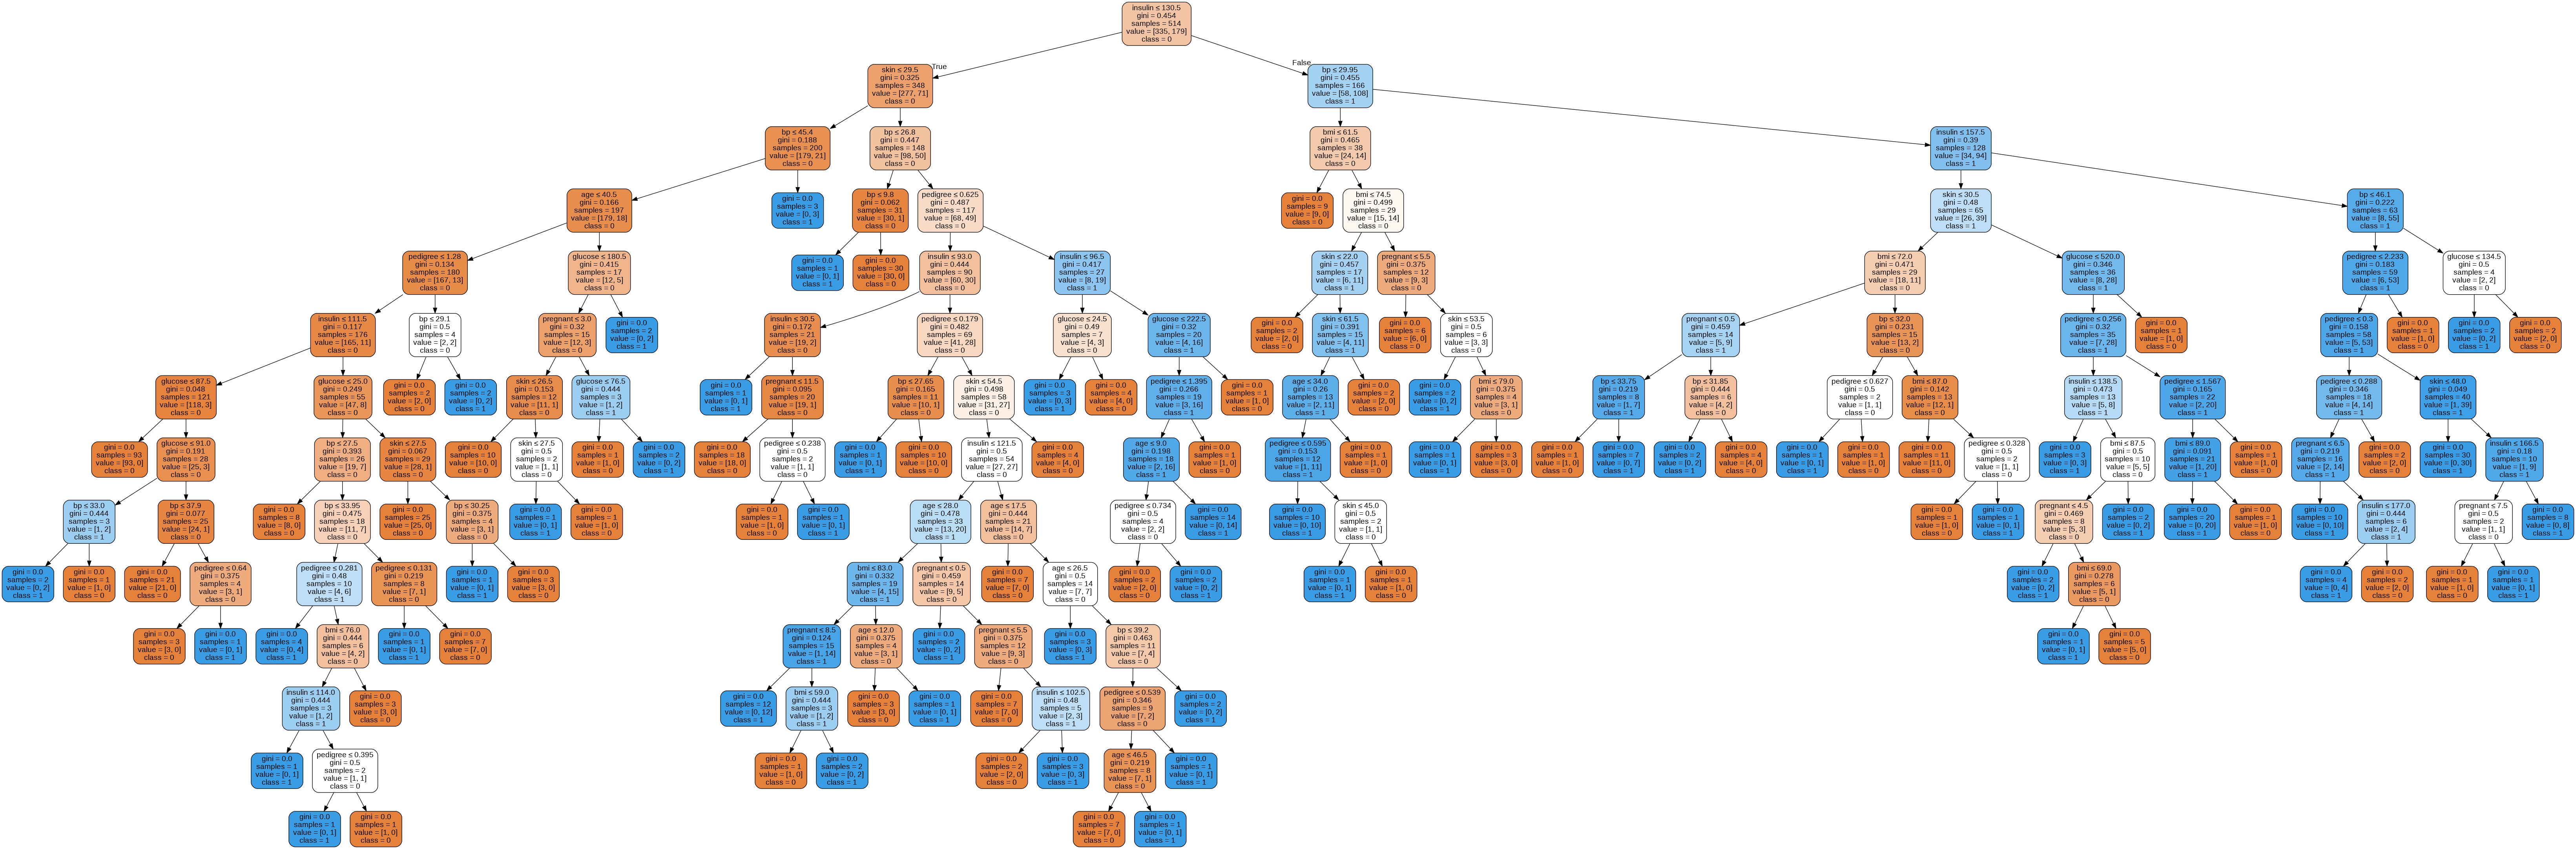

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
for i in x:
  clf = DecisionTreeClassifier(criterion="gini", max_depth=i)

  clf=clf.fit(X_train,y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7165354330708661
Accuracy: 0.7598425196850394
Accuracy: 0.7637795275590551
Accuracy: 0.7637795275590551
Accuracy: 0.7755905511811023
Accuracy: 0.7755905511811023
Accuracy: 0.7637795275590551
Accuracy: 0.6929133858267716
Accuracy: 0.6850393700787402
Accuracy: 0.7204724409448819


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7637795275590551


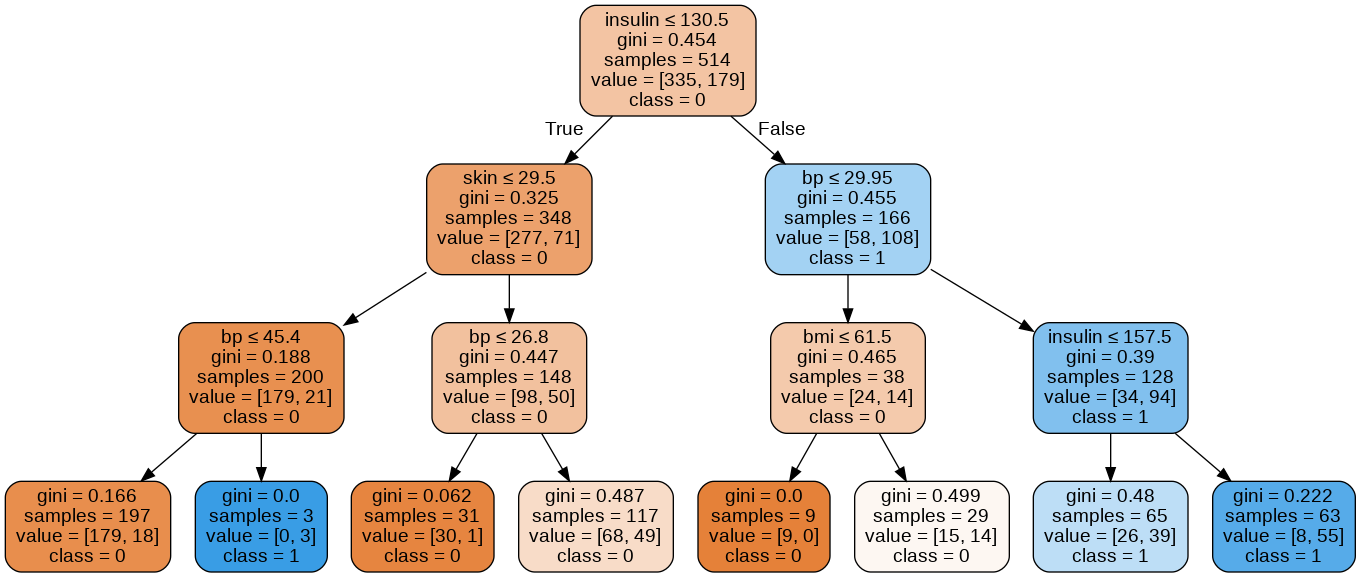

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())